In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.set_random_seed(777)  # reproducibility

if "DISPLAY" not in os.environ:
    # remove Travis CI Error
    matplotlib.use('Agg')

import matplotlib.pyplot as plt


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [2]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [4]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('example.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.01561974 0.03530366 0.03650384 0.2052792  0.04526157]] -> [0.04182254]
[[0.02946185 0.02585198 0.02121565 0.18494219 0.01055033]
 [0.00084512 0.         0.         0.20783365 0.        ]
 [0.01221018 0.02024455 0.0141731  0.21175047 0.01057949]
 [0.         0.02096719 0.0159631  0.19786681 0.02424832]
 [0.03182226 0.02804874 0.02993083 0.24270861 0.02692962]
 [0.01561974 0.03530366 0.03650384 0.2052792  0.04526157]
 [0.04764595 0.04776134 0.05415708 0.1993457  0.04182254]] -> [0.07428976]
[[0.00084512 0.         0.         0.20783365 0.        ]
 [0.01221018 0.02024455 0.0141731  0.21175047 0.01057949]
 [0.         0.02096719 0.0159631  0.19786681 0.02424832]
 [0.03182226 0.02804874 0.02993083 0.24270861 0.02692962]
 [0.01561974 0.03530366 0.03650384 0.2052792  0.04526157]
 [0.04764595 0.04776134 0.05415708 0.1993457  0.04182254]
 [0.03671794 0.06735843 0.05469703 0.20263512 0.07428976]] -> [0.12194108]
[[0.01221018 0.02024455 0.0141731  0.21175047 0.01057949]
 [0.         0.020967

 [0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]] -> [0.75122247]
[[0.7528542  0.7575814  0.74958032 0.23826297 0.73108369]
 [0.74411187 0.76483636 0.73908988 0.17795106 0.77389699]
 [0.78030509 0.77087721 0.76715721 0.1385229  0.74865774]
 [0.73394165 0.74616425 0.73531928 0.28150937 0.7191635 ]
 [0.73283427 0.73422684 0.74074781 0.13604015 0.74381983]
 [0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]
 [0.75422375 0.74639553 0.75248532 0.13964327 0.75122247]] -> [0.74565594]
[[0.74411187 0.76483636 0.73908988 0.17795106 0.77389699]
 [0.78030509 0.77087721 0.76715721 0.1385229  0.74865774]
 [0.73394165 0.74616425 0.73531928 0.28150937 0.7191635 ]
 [0.73283427 0.73422684 0.74074781 0.13604015 0.74381983]
 [0.74892022 0.74824526 0.756975   0.12167249 0.750319  ]
 [0.75422375 0.74639553 0.75248532 0.13964327 0.75122247]
 [0.74280048 0.73812883 0.76017337 0.04654477 0.74565594]] -> [0.78677881]
[[0.78030509 0.77087721 0.76715721 0.1385229  0.74865774]
 [0.73394165 0.746164

 [0.87524689 0.8773021  0.8992042  0.11278121 0.89420545]] -> [0.93424998]
[[0.83634357 0.83235627 0.8463854  0.07570135 0.83346838]
 [0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]
 [0.85441092 0.88340082 0.87445273 0.18365152 0.8822271 ]
 [0.88468858 0.89204311 0.91102983 0.15764991 0.90041324]
 [0.89943398 0.89022214 0.90516107 0.15681635 0.88721069]
 [0.87524689 0.8773021  0.8992042  0.11278121 0.89420545]
 [0.90409666 0.92262369 0.93095419 0.15143856 0.93424998]] -> [0.91839536]
[[0.83095236 0.83784794 0.85078697 0.09725733 0.83763602]
 [0.85441092 0.88340082 0.87445273 0.18365152 0.8822271 ]
 [0.88468858 0.89204311 0.91102983 0.15764991 0.90041324]
 [0.89943398 0.89022214 0.90516107 0.15681635 0.88721069]
 [0.87524689 0.8773021  0.8992042  0.11278121 0.89420545]
 [0.90409666 0.92262369 0.93095419 0.15143856 0.93424998]
 [0.93842481 0.92695931 0.93189321 0.14058439 0.91839536]] -> [0.89333115]
[[0.85441092 0.88340082 0.87445273 0.18365152 0.8822271 ]
 [0.88468858 0.892043

In [5]:

# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

[step: 0] loss: 161.7401580810547
[step: 1] loss: 102.94868469238281
[step: 2] loss: 60.83835220336914
[step: 3] loss: 32.31366729736328
[step: 4] loss: 15.422471046447754
[step: 5] loss: 8.562556266784668
[step: 6] loss: 9.627199172973633
[step: 7] loss: 14.974802017211914
[step: 8] loss: 19.723554611206055
[step: 9] loss: 20.920589447021484
[step: 10] loss: 18.693626403808594
[step: 11] loss: 14.568742752075195
[step: 12] loss: 10.1266450881958
[step: 13] loss: 6.494210720062256
[step: 14] loss: 4.249967098236084
[step: 15] loss: 3.47745418548584
[step: 16] loss: 3.8668675422668457
[step: 17] loss: 4.848627090454102
[step: 18] loss: 5.800662994384766
[step: 19] loss: 6.2707624435424805
[step: 20] loss: 6.084384918212891
[step: 21] loss: 5.317709922790527
[step: 22] loss: 4.201140403747559
[step: 23] loss: 3.0143086910247803
[step: 24] loss: 2.0035128593444824
[step: 25] loss: 1.3307857513427734
[step: 26] loss: 1.0529768466949463
[step: 27] loss: 1.1255922317504883
[step: 28] loss: 1

[step: 230] loss: 0.73468416929245
[step: 231] loss: 0.7334686517715454
[step: 232] loss: 0.7322496771812439
[step: 233] loss: 0.7310271859169006
[step: 234] loss: 0.7298011779785156
[step: 235] loss: 0.7285720109939575
[step: 236] loss: 0.7273393869400024
[step: 237] loss: 0.7261033654212952
[step: 238] loss: 0.7248638868331909
[step: 239] loss: 0.7236211895942688
[step: 240] loss: 0.7223750352859497
[step: 241] loss: 0.7211257815361023
[step: 242] loss: 0.7198730111122131
[step: 243] loss: 0.7186172604560852
[step: 244] loss: 0.7173582315444946
[step: 245] loss: 0.7160959839820862
[step: 246] loss: 0.7148306369781494
[step: 247] loss: 0.7135621905326843
[step: 248] loss: 0.7122906446456909
[step: 249] loss: 0.7110161781311035
[step: 250] loss: 0.7097384333610535
[step: 251] loss: 0.7084578275680542
[step: 252] loss: 0.7071744203567505
[step: 253] loss: 0.7058882713317871
[step: 254] loss: 0.7045989632606506
[step: 255] loss: 0.7033069729804993
[step: 256] loss: 0.7020121812820435
[st

[step: 466] loss: 0.4844526946544647
[step: 467] loss: 0.48390594124794006
[step: 468] loss: 0.4833623468875885
[step: 469] loss: 0.4828217625617981
[step: 470] loss: 0.482284814119339
[step: 471] loss: 0.48175084590911865
[step: 472] loss: 0.4812200367450714
[step: 473] loss: 0.4806923270225525
[step: 474] loss: 0.48016804456710815
[step: 475] loss: 0.479646772146225
[step: 476] loss: 0.47912850975990295
[step: 477] loss: 0.47861337661743164
[step: 478] loss: 0.47810137271881104
[step: 479] loss: 0.477592408657074
[step: 480] loss: 0.4770866632461548
[step: 481] loss: 0.4765838384628296
[step: 482] loss: 0.47608405351638794
[step: 483] loss: 0.475587397813797
[step: 484] loss: 0.47509369254112244
[step: 485] loss: 0.4746030569076538
[step: 486] loss: 0.47411513328552246
[step: 487] loss: 0.47363051772117615
[step: 488] loss: 0.4731487035751343
[step: 489] loss: 0.4726698398590088
[step: 490] loss: 0.4721939265727997
[step: 491] loss: 0.4717211425304413
[step: 492] loss: 0.471250802278

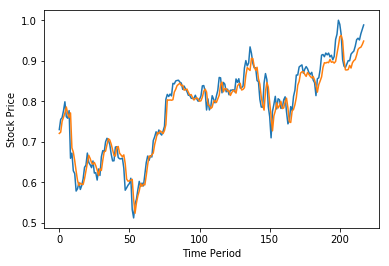

In [6]:
    # Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()